# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")
api_key


'a69f1362b664445b9517b56b3314dce6'

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(
        q="Bitcoin",
        language= "en",
        sort_by="relevancy"
)
print(f"total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")
Bitcoin_headlines["articles"][0]

total articles about Bitcoin: 5067


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(
        q="Ethereum",
        language= "en",
        sort_by="relevancy"
)
print(f"total articles about Ethereum: {Ethereum_headlines['totalResults']}")
Ethereum_headlines["articles"][0]

total articles about Ethereum: 1336


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
 'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
 'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
 'publishedAt': '2020-11-23T14:16:00Z',
 'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        bitcoin_sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sent_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Date", "Compound", "Negative", "Neutral", "Positive", "Text"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text
0,2020-12-03,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,2020-12-16,0.6486,0.0,0.826,0.174,After reaching a previous all-time high on Nov...
2,2020-12-16,0.4019,0.0,0.928,0.072,Its been almost three years to the day since t...
3,2020-11-20,0.2023,0.0,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,2020-12-06,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [7]:
# Create the Facebook Libra sentiment scores DataFrame

ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        ethereum_sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sent_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols =["Date", "Compound", "Negative", "Neutral", "Positive", "Text"]
eth_sent_df = eth_sent_df[cols]

eth_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text
0,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,2020-11-23,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,2020-12-16,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,2020-12-16,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [8]:
# Describe the Bitcoin Sentiment
btc_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.240300,0.013211,0.912684,0.074053
std,0.356703,0.031839,0.082789,0.077560
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.202300,0.000000,0.928000,0.050000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [9]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.091955,0.014050,0.941400,0.044550
std,0.251162,0.046844,0.101239,0.077609
min,-0.340000,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.177900,0.000000,1.000000,0.064000
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score? 

A: Ethereum had the higherst mean positive sceore coming to

Q: Which coin had the highest compound score?

A: Ethereum  

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
from nltk.corpus import reuters, stopwords
import nltk

nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\jacio\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jacio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + addl_stopwords)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    
    return text


In [14]:
import nltk
from nltk import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jacio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_sent_df.Text]
btc_sent_df['Tokens'] = btc_tokens
btc_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text,Tokens
0,2020-12-03,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
1,2020-12-16,0.6486,0.0,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,2020-12-16,0.4019,0.0,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, wa, c..."
3,2020-11-20,0.2023,0.0,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [16]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_sent_df.Text]
eth_sent_df['Tokens'] = eth_tokens
eth_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text,Tokens
0,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, virtual, currenc..."
1,2020-11-23,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, virtual, currenc..."
2,2020-11-23,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, xrp, soar..."
3,2020-12-16,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."
4,2020-12-16,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_sent_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('visa', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'offer'): 1,
 ('offer', 'first'): 1,
 ('first', 'reward'): 1,
 ('reward', 'credit'): 1,
 ('credit', 'card'): 1}

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_sent_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('file', 'photo'): 1,
 ('photo', 'representation'): 1,
 ('representation', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'standing'): 1,
 ('standing', 'pc'): 1,
 ('pc', 'motherboard'): 1,
 ('motherboard', 'seen'): 1,
 ('seen', 'illustration'): 1,
 ('illustration', 'picture'): 1}

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bigstr = []
for token in btc_sent_df.Tokens:
    bigstr += token
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 19),
 ('ha', 10),
 ('cryptocurrency', 5),
 ('november', 5),
 ('year', 5),
 ('photo', 5),
 ('alltime', 4),
 ('high', 4),
 ('price', 4),
 ('market', 4)]

In [22]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
bigstr = []
for token in eth_sent_df.Tokens:
    bigstr += token
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20),
 ('reuters', 18),
 ('photo', 13),
 ('currency', 13),
 ('representation', 12),
 ('virtual', 12),
 ('taken', 12),
 ('illustration', 11),
 ('reutersdado', 11),
 ('file', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
# btc_corpus = ""
# sw = set(stopwords.words("english") + addl_stopwords)
# for token in btc_sent_df.Text:
#     btc_corpus +=token
# long_string = "".join(str(x) for x in tokenizer(btc_corpus))
# wc =WordCloud(collocations=False).generate(long_string)
# plt.title("Bitcoin Word Cloud")
# plt.style.use("seaborn-whitegrid")
# plt.imshow(wc)
# plt.axis("off")
# plt.show


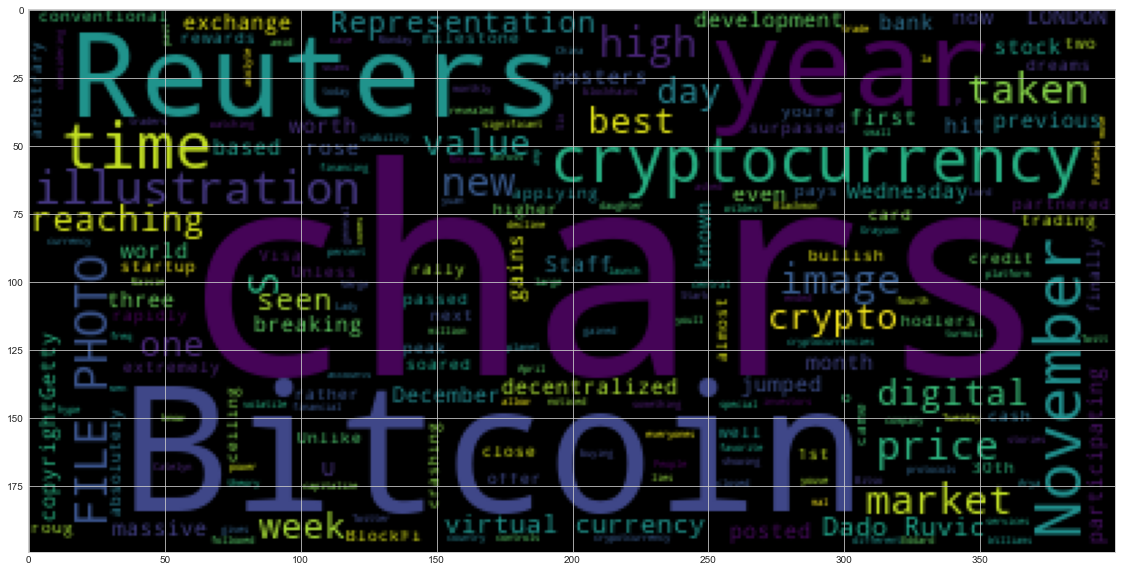

In [25]:
btc_text_df = btc_sent_df["Text"]
btc_corpus = btc_text_df.str.cat()
btc_corpus
wc = WordCloud().generate(btc_corpus)
plt.imshow(wc)

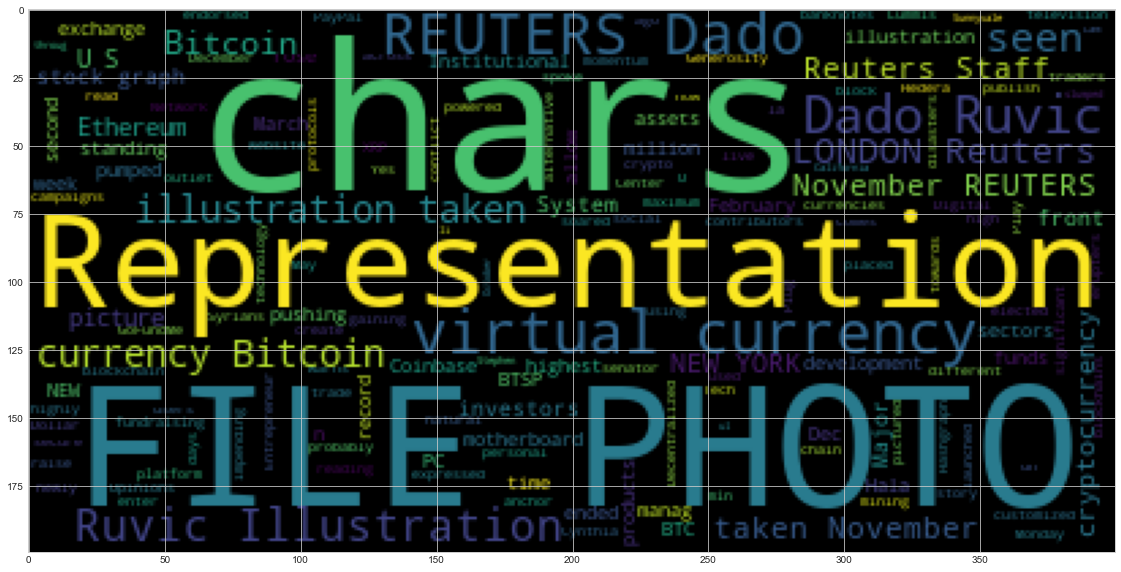

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
# eth_corpus = ""
# sw = set(stopwords.words("english") + addl_stopwords)
# for token in eth_sent_df.Text:
#     eth_corpus +=token
# long_string = "".join(str(x) for x in tokenizer(eth_corpus))
# wc =WordCloud(collocations=False).generate(long_string)
# plt.title("Ethereum Word Cloud")
# plt.style.use("seaborn-whitegrid")
# plt.imshow(wc)
# plt.axis("off")
# plt.show
eth_text_df = eth_sent_df["Text"]
eth_corpus = eth_text_df.str.cat()
eth_corpus
wc = WordCloud().generate(eth_corpus)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy
import matplotlib.pyplot as plt 

In [28]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [29]:
import spacy
import nltk
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 


nlp = spacy.load("en_core_web_sm")

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_corpus

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives th

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_corpus)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style="ent")

In [35]:
# List all Entities
# YOUR CODE HERE!
btc_ents = set([ent.text for ent in btc_ner.ents])
btc_ents

{'$62 million',
 '10,000',
 '10.8 percent',
 '12,800',
 '14,800',
 '19,665',
 '20,000',
 '2020',
 '500',
 '6',
 '7',
 'April',
 'Arya Stark',
 'BBC News',
 'Bitcoin',
 'Dado Ruvic/File Photo',
 'December 1st',
 'December 2017',
 'Eddard',
 'Grayson Blackmon /',
 'January 6, 2020',
 'Justin HarperBusiness',
 'LONDON',
 'Lady Catelyn',
 'March 13, 2020',
 'Mexico',
 'Monday',
 'November',
 'November 19, 2020',
 'November 2017',
 'November 30th, 2020',
 'One',
 'REUTERS/',
 'Reu',
 'Reuters',
 'Tom Wilson',
 'Tuesday',
 'Twitter',
 'U.S.',
 'Visa',
 'Wednesday',
 'Williams',
 'a year',
 'above $17,000',
 'above $18,000',
 'above $20,000',
 'acolyte',
 'almost three years',
 'bitcoin',
 'chars]4',
 'chars]6',
 'chars]8',
 'chars]Six years',
 'digital',
 'digital yuan',
 'evening',
 'first',
 'fourth',
 'hype',
 'monthly',
 'more than $18,000',
 'more than 170%',
 'one',
 'the Faceless Men',
 'the People’s Bank of China',
 'the day',
 'the next 20 days',
 'the past few weeks',
 'the year',


---

## Ethereum NER

In [36]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_corpus

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado 

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_corpus)
# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style="ent")

In [39]:
# List all Entities
# YOUR CODE HERE!
eth_ents = set([ent.text for ent in eth_ner.ents])
eth_ents

{'$429 million',
 '15, 2020',
 '20,000',
 '6 min',
 'A few days ago',
 'Bitcoin',
 'California',
 'Coinbase',
 'Cynthia Lummis',
 'February 3, 2018',
 'Hala Systems',
 'Hedera',
 'LONDON',
 'March 13, 2020',
 'May 26, 2020',
 'Monday',
 'November 19, 2020',
 'October 28, 2013',
 'REUTERS/',
 'REUTERS/Stephen Lam',
 'Reuters',
 'Sunnyvale',
 'Syrians',
 'U.S.',
 'US',
 'XRP',
 'YORK',
 'chars]The New York Times',
 'second',
 'the Generosity Network',
 'the Plug and Play Tech Center',
 'the week ended Dec. 7'}